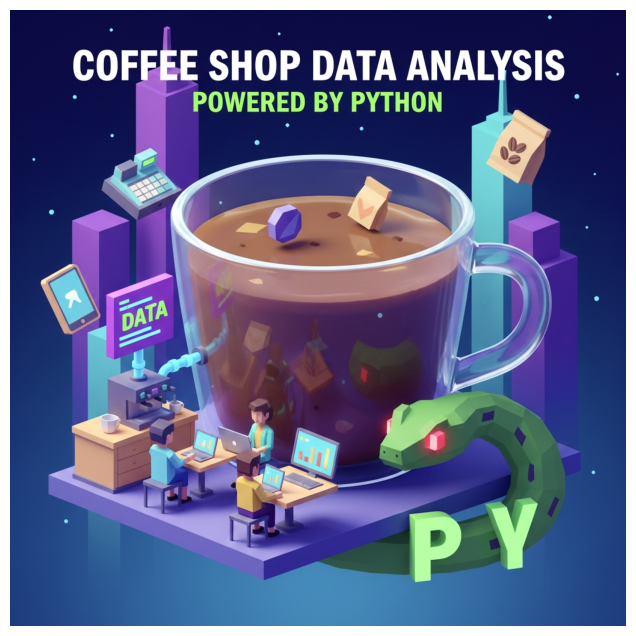

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread(
    "C:\\Users\\zahra_gmdmxxo\\OneDrive\\Desktop\\Datacube\\3.PYTHON\\final_project\\coffe_photo.jpg"
)
plt.figure(figsize=(8,8))
plt.imshow(image)
plt.axis('off')
plt.show()


# Coffee Shop Sales Analysis ☕️


## I. Dataset Overview and Basic Statistics

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install openpyxl

coffe_data = pd.read_excel("C:\\Users\\zahra_gmdmxxo\\OneDrive\\Desktop\\Datacube\\3.PYTHON\\final_project\\coffee_shop_sales.xlsx"
)

### Coffee Shop Sales Dataset Overview

In [3]:

coffe_data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


### **Information about this dataset:**


| Column Name | Description |
|------------|------------|
| **transaction_id** | Unique sequential ID representing an individual transaction |
| **transaction_date** | Date of the transaction (MM/DD/YY) |
| **transaction_time** | Timestamp of the transaction (HH:MM:SS) |
| **transaction_qty** | Quantity of items sold |
| **store_id** | Unique ID of the coffee shop where the transaction took place |
| **store_location** | Location of the coffee shop where the transaction took place |
| **product_id** | Unique ID of the product sold |
| **unit_price** | Retail price of the product sold |
| **product_category** | Description of the product category |
| **product_type** | Description of the product type |
| **product_detail** | Description of the product detail |

This dataset contains 149,116 rows and 11 columns.

In [4]:
coffe_data.shape

(149116, 11)

All column names are well-formatted and do not require any changes.

In [5]:
coffe_data.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

This provides information about data types and non-null values.

In [6]:
coffe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


The dataset contains no missing (null) values across all columns.

In [7]:
string_col=['store_id','transaction_id','store_location','product_id','product_category','product_type','product_detail']
for col in string_col:
  coffe_data[col]=coffe_data[col].astype("string")

Notes on changes:
- ID columns converted to string: transaction_id, store_id, product_id
 - Object columns ensured as string: store_location, product_category, product_type, product_detail

In [8]:
coffe_data.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

There are no duplicate values in the dataset.

In [9]:
coffe_data.duplicated().sum()

np.int64(0)

### **Descriptive Statistics Summary**

The dataset contains **149,116 transactions**. Most transactions include **1–2 items**, with an average quantity of **1.44**.  
The average unit price is **$3.38**, and most products are low-priced, although a few high-priced items exist.  
Transactions span from **January to June 2023**, indicating six months of sales data.

In [10]:
coffe_data.describe().T

,count,mean,min,25%,50%,75%,max,std
transaction_date,149116,2023-04-15 11:50:32.173609984,2023-01-01 00:00:00,2023-03-06 00:00:00,2023-04-24 00:00:00,2023-05-30 00:00:00,2023-06-30 00:00:00,NaN
transaction_qty,149116.0,1.438276,1.0,1.0,1.0,2.0,8.0,0.542509
unit_price,149116.0,3.382219,0.8,2.5,3.0,3.75,45.0,2.658723


# II. Sales Performance Analysis

### Here we have analysed these sales data across **three main categories**:


#### 1. Time-Based Sales Analysis
Analysis focused on **when sales occur**, looking at dates, months, and hours.

- Top Sales Date  
- Monthly Sales Performance  
- Top Sales Hours  
- Best Selling Days by Revenue  


#### 2. Product Performance Analysis
Analysis focused on **how different products perform** in terms of revenue and quantity.

- Top 5 Best Selling Products by Revenue  
- Products with the Lowest Sales Revenue  
- Best Selling Products by Quantity  
- Total Sales by Product Category  
- Monthly Performance by Product Category  
- Category by Store Comparison  


#### 3. Store Location Analysis
Analysis focused on **store-level performance and comparison**.

- Sales Comparison across Store Locations  
- Monthly Revenue by Store Location  

----

#### To evaluate sales performance, total sales (revenue) were calculated at the transaction level by multiplying unit price and quantity.

In [11]:
coffe_data["total_sales"]=(coffe_data["transaction_qty"]*coffe_data["unit_price"])
coffe_data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_sales
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2


 ### Key Sales KPIs

- **Total Transactions:** 149,116  
- **Total Items Sold:** 214,470  
- **Total Revenue:** $ 698,812.33  
- **Average Order Value (AOV):** $ 5.00
- **Average Items Per Transaction:** 1-2

The data shows that customers shop often but usually buy only 1–2 items per transaction, which keeps the average order value low at $5.

In [12]:
total_transactions= coffe_data['transaction_id'].nunique()

total_items_sold= coffe_data["transaction_qty"].sum()

total_revenue= coffe_data["total_sales"].sum().round(2)

aov=(total_revenue/total_transactions).round(0)

ait=(total_items_sold/total_transactions).round(1)

total_transactions, 
total_items_sold, 
total_revenue, 
print("Total Transactions =", total_transactions)
print("Total Items Sold =", total_items_sold)
print("Total Revenue =", total_revenue)
print("Avg Order Value =", aov)
print("Avg Item Per Transaction =", ait)

Total Transactions = 149116
Total Items Sold = 214470
Total Revenue = 698812.33
Avg Order Value = 5.0
Avg Item Per Transaction = 1.4


## A. Time-based Sales Analysis

### 1. Top Sales Date

In [13]:
sales_peak = (
    coffe_data.groupby('transaction_date').agg(total_transactions=('transaction_id', 'count'),total_revenue=('total_sales', 'sum'))
)

sales_peak = sales_peak.sort_values('total_revenue', ascending=False).reset_index()
sales_peak.head()

,transaction_date,total_transactions,total_revenue
0,2023-06-19,1343,6403.91
1,2023-06-13,1281,6189.36
2,2023-06-08,1269,6151.59
3,2023-06-17,1099,6117.60
4,2023-06-18,1290,6026.09


Based on the results, the top 5 dates represent the peak sales periods, and all of these peak dates occur in June, indicating higher sales activity during this month.

In [14]:
sales_low = (
    coffe_data.groupby('transaction_date').agg(total_transactions=('transaction_id', 'count'),total_revenue=('total_sales', 'sum'))
)

sales_low = sales_low.sort_values('total_revenue', ascending=True).reset_index()
sales_low.head()

,transaction_date,total_transactions,total_revenue
0,2023-01-28,470,2037.10
1,2023-01-29,459,2060.75
2,2023-02-06,489,2203.40
3,2023-01-04,497,2220.10
4,2023-01-06,509,2273.85


Lower sales on these dates are mainly driven by fewer customer transactions.

### 2. Monthly Sales Performance

In [15]:
coffe_data['month'] = coffe_data['transaction_date'].dt.to_period('M')
monthly_sales=coffe_data.groupby('month').agg({ 'total_sales': 'sum','transaction_qty':'count'}
                                                              ).reset_index().sort_values('month').rename(columns={
    'total_sales': 'total_revenue',
    'transaction_qty': 'total_items_sold'
})
monthly_sales['revenue_pct_change'] = monthly_sales['total_revenue'].pct_change() * 100
monthly_sales['revenue_pct_change'] = monthly_sales['revenue_pct_change'].round(2)

monthly_sales

,month,total_revenue,total_items_sold,revenue_pct_change
0,2023-01,81677.74,17314,NaN
1,2023-02,76145.19,16359,-6.77
2,2023-03,98834.68,21229,29.80
3,2023-04,118941.08,25335,20.34
4,2023-05,156727.76,33527,31.77
5,2023-06,166485.88,35352,6.23


- Sales revenue shows a clear upward trend from January to June 2023.
- After a slight decline in February (-6.77%), revenue recovered strongly in March (+29.8%) and continued to grow steadily through April and May. 
- The highest growth was observed in May, driven by a significant increase in transaction volume. 
- In June, revenue reached its peak, although the growth rate slowed to 6.23%, indicating more stable and mature sales performance.

The revenue decline in February is mainly driven by lower sales volume, likely due to the shorter number of days in the month, indicating a seasonal effect rather than a performance issue.

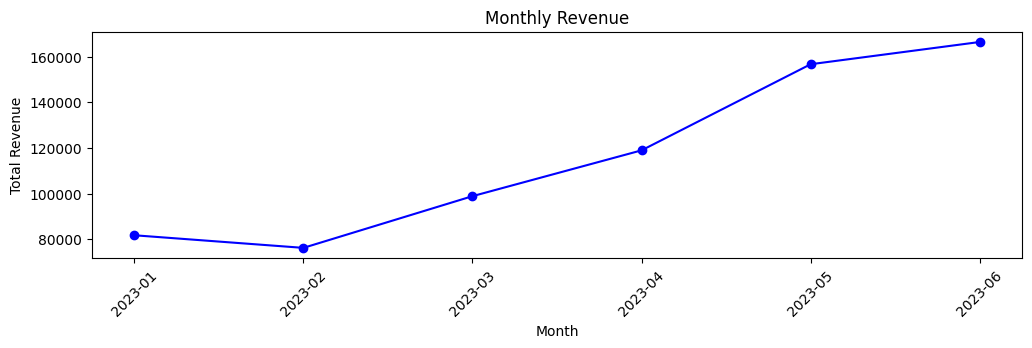

In [16]:
import matplotlib.pyplot as plt
monthly_sales['month'] = monthly_sales['month'].astype(str)
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1)
plt.plot(monthly_sales['month'], monthly_sales['total_revenue'], marker='o', color='blue')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

### 3. Top Sales Hours

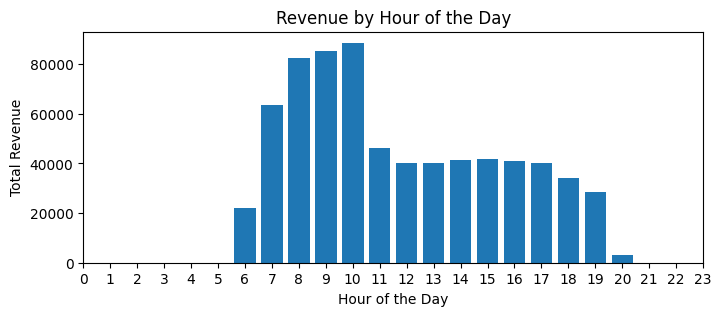

In [17]:
coffe_data['hour'] = pd.to_datetime(coffe_data['transaction_time'],format='%H:%M:%S').dt.hour
hourly_revenue = (coffe_data.groupby('hour')['total_sales'].sum().reset_index())

plt.figure(figsize=(8,3))
plt.bar(hourly_revenue['hour'], hourly_revenue['total_sales'])
plt.xlabel('Hour of the Day')
plt.ylabel('Total Revenue')
plt.title('Revenue by Hour of the Day')
plt.xticks(range(0, 24))
plt.show()


The analysis shows that the highest revenue is generated during the morning hours, primarily between 7:00 AM and 11:00 AM. During this period, sales peak significantly, indicating strong customer demand in the early hours of the day.

### 4. Best-Selling Days by Revenue

In [18]:
coffe_data["weekday"] = coffe_data["transaction_date"].dt.day_name()

sales_by_day = (
    coffe_data.groupby("weekday")
    .agg(
        total_transactions=("transaction_id", "count"),
        total_items_sold=("transaction_qty", "sum"),
        total_revenue=("total_sales", "sum")
    )
    .sort_values("total_revenue", ascending=False)
    .reset_index()
)

sales_by_day

,weekday,total_transactions,total_items_sold,total_revenue
0,Monday,21643,31231,101677.28
1,Friday,21701,31207,101373.00
2,Thursday,21654,31162,100767.78
3,Wednesday,21310,30625,100313.54
4,Tuesday,21202,30449,99455.94
5,Sunday,21096,30182,98330.31
6,Saturday,20510,29614,96894.48



- **Monday** generates the **highest total revenue** (≈ $101.7K), despite having a similar number of transactions compared to other weekdays.
- **Friday** records the **highest transaction count**, but total revenue remains slightly lower than Monday.
- **Midweek days (Tuesday–Thursday)** show **stable and consistent sales performance** with minimal variation in both transaction volume and revenue.
- **Weekend sales (Saturday and Sunday)** are comparatively lower in terms of both **transaction count and total revenue**.

## B. Product Performance Analysis

In [19]:
coffe_data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_sales,month,hour,weekday
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,2023-01,7,Sunday
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01,7,Sunday
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,2023-01,7,Sunday
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,2023-01,7,Sunday
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01,7,Sunday


### 1. Top 5 Best-Selling Products by Revenue

In [20]:
top_products=coffe_data.groupby("product_type")["total_sales"].sum().sort_values(ascending=False
    ).head().reset_index().rename(columns={"total_sales":"total_revenue"})

top_products

,product_type,total_revenue
0,Barista Espresso,91406.20
1,Brewed Chai tea,77081.95
2,Hot chocolate,72416.00
3,Gourmet brewed coffee,70034.60
4,Brewed Black tea,47932.00


Barista Espresso takes the lead, generating $91,406.20 in total sales.

### 2. Products with the Lowest Sales Revenue (Top 5)

In [21]:
low_revenue_products=coffe_data.groupby("product_type")["total_sales"].sum().sort_values(ascending=True
    ).head().reset_index().rename(columns={"total_sales":"total_revenue"})

low_revenue_products

,product_type,total_revenue
0,Green beans,1340.00
1,Green tea,1470.75
2,Organic Chocolate,1679.60
3,Sugar free syrup,2324.00
4,Black tea,2711.85


These product types generate the lowest total revenue, indicating limited customer demand compared to other products in the dataset.

### 3. Best-Selling Products by Quantity

In [22]:
highest_sales_volume=coffe_data.groupby("product_type")["transaction_qty"].sum().sort_values(
    ascending=False).head().reset_index().rename(columns={"transaction_qty":"total_items_sold"})
highest_sales_volume

,product_type,total_items_sold
0,Brewed Chai tea,26250
1,Gourmet brewed coffee,25973
2,Barista Espresso,24943
3,Brewed Black tea,17462
4,Hot chocolate,17457


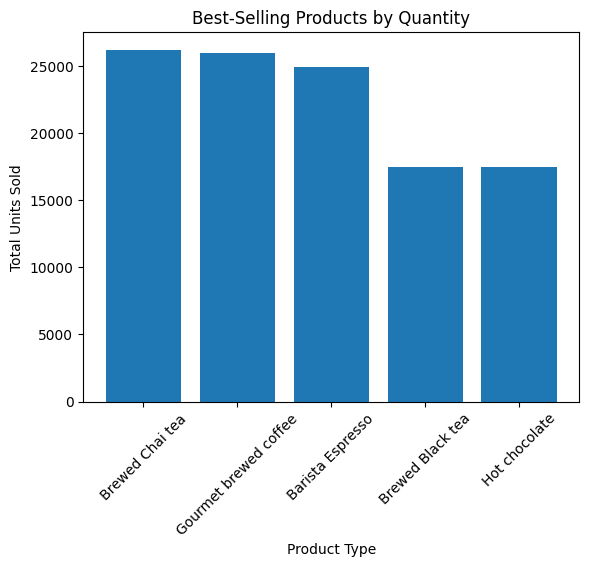

In [23]:
plt.figure()
plt.bar(
    highest_sales_volume["product_type"],
    highest_sales_volume["total_items_sold"]
)

plt.title("Best-Selling Products by Quantity")
plt.xlabel("Product Type")
plt.ylabel("Total Units Sold")
plt.xticks(rotation=45)

plt.show()

Brewed Chai tea sold the most with 26,250 units, followed closely by Gourmet brewed coffee and Barista Espresso.

### 4. Total Sales by Product Category

In [24]:
sales_by_category = (
    coffe_data.groupby("product_category")
    .agg( total_revenue=("total_sales", "sum"),total_transactions=("transaction_id", "count"))
    .sort_values(by="total_revenue", ascending=False)
    .reset_index()
)

sales_by_category

,product_category,total_revenue,total_transactions
0,Coffee,269952.45,58416
1,Tea,196405.95,45449
2,Bakery,82315.64,22796
3,Drinking Chocolate,72416.00,11468
4,Coffee beans,40085.25,1753
5,Branded,13607.00,747
6,Loose Tea,11213.60,1210
7,Flavours,8408.80,6790
8,Packaged Chocolate,4407.64,487


Coffee generates the highest revenue and transaction volume, followed by Tea, while other categories contribute smaller shares.

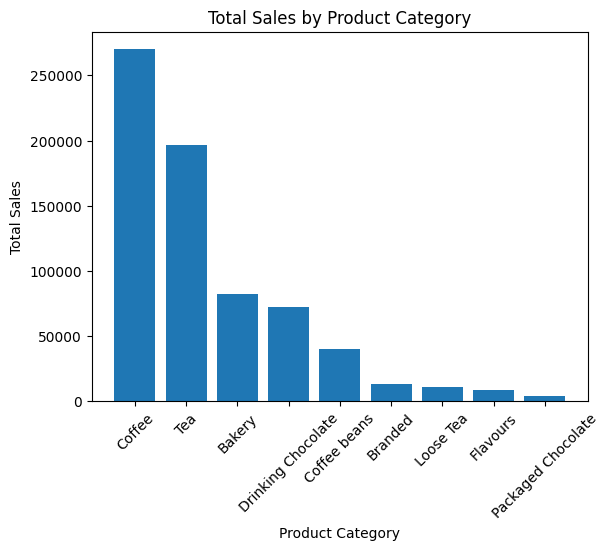

In [25]:
plt.figure()
plt.bar(
    sales_by_category["product_category"],
    sales_by_category["total_revenue"]
)

plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)

plt.show()

### 5. Monthly Performance by Product Category

In [26]:
monthly_category_revenue = coffe_data.pivot_table( index='month', columns='product_category',values='total_sales',
    aggfunc='sum')

monthly_category_revenue

product_category,Bakery,Branded,Coffee,Coffee beans,Drinking Chocolate,Flavours,Loose Tea,Packaged Chocolate,Tea
month,,,,,,,,,
2023-01,9535.75,1890.0,31256.85,5245.25,8337.75,974.4,1293.85,521.94,22621.95
2023-02,9038.82,1235.0,29268.95,4077.50,8132.25,930.4,1277.85,451.02,21733.40
2023-03,11902.58,1801.0,38303.60,5256.20,10253.50,1172.0,1646.95,588.20,27910.65
2023-04,14021.70,2379.0,45971.20,6824.70,12266.75,1418.4,1829.15,873.23,33356.95
2023-05,18565.52,2889.0,60362.85,8768.95,16319.75,1905.6,2395.15,981.09,44539.85
2023-06,19251.27,3413.0,64789.00,9912.65,17106.00,2008.0,2770.65,992.16,46243.15


Monthly performance shows consistent growth across all categories, with Coffee and Tea generating the highest sales.

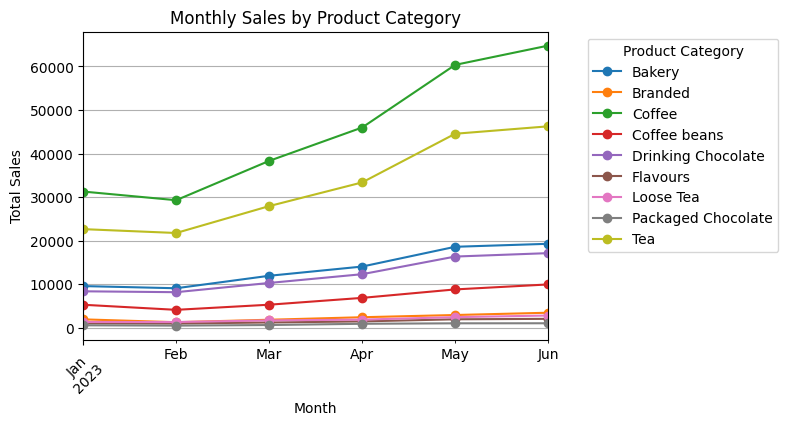

In [27]:
monthly_category_revenue.plot(kind='line', figsize=(6,4), marker='o')
plt.title('Monthly Sales by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Product Category', bbox_to_anchor=(1.07, 1), loc='upper left')
plt.show()

### 6. Category by store comparison

In [28]:
store_category_revenue = coffe_data.pivot_table( columns='store_location', index='product_category',values='total_sales',
    aggfunc='sum')

store_category_revenue

store_location,Astoria,Hell's Kitchen,Lower Manhattan
product_category,,,
Bakery,26599.75,27386.95,28328.94
Branded,5457.00,1942.00,6208.00
Coffee,89744.30,91222.65,88985.50
Coffee beans,10219.20,18635.10,11230.95
Drinking Chocolate,26335.25,23586.25,22494.50
Flavours,1764.80,2876.80,3767.20
Loose Tea,3194.00,4461.35,3558.25
Packaged Chocolate,1089.71,1698.77,1619.16
Tea,67839.90,64701.30,63864.75


<Figure size 1000x600 with 0 Axes>

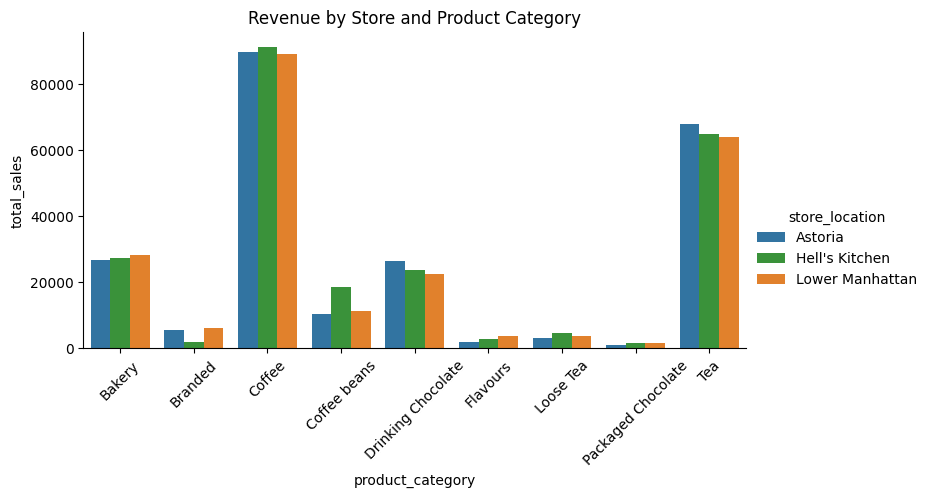

In [29]:
store_category_revenue_reset = store_category_revenue.reset_index()
store_category_revenue_melted = store_category_revenue_reset.melt(
    id_vars='product_category',
    var_name='store_location',
    value_name='total_sales'
)
plt.figure(figsize=(10,6))
custom_palette = sns.color_palette(["#1f77b4", "#2ca02c", "#ff7f0e"])
sns.catplot(
    data=store_category_revenue_melted,
    x='product_category',
    y='total_sales',
    hue='store_location',
    kind='bar', palette=custom_palette,
    height=3.9,
    aspect=2
)
plt.xticks(rotation=45)
plt.title('Revenue by Store and Product Category')
plt.show()

Coffee consistently leads revenue in all stores, with Bakery and Tea as strong secondary categories.

## C. Store Location Analysis

In [30]:
coffe_data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_sales,month,hour,weekday
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,2023-01,7,Sunday
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01,7,Sunday
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,2023-01,7,Sunday
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,2023-01,7,Sunday
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01,7,Sunday


### 1. Sales comparison across store locations

In [31]:
revenue_by_store = (coffe_data.groupby("store_location").agg(total_revenue=("total_sales", "sum"),
total_items_sold=("transaction_qty", "sum"),total_transactions=("transaction_id", "count"))
                    .sort_values(by="total_revenue", ascending=False).reset_index()
)

revenue_by_store

,store_location,total_revenue,total_items_sold,total_transactions
0,Hell's Kitchen,236511.17,71737,50735
1,Astoria,232243.91,70991,50599
2,Lower Manhattan,230057.25,71742,47782


Among all store locations, Hell's Kitchen generates the highest total revenue, driven by the largest number of transactions.

While Lower Manhattan records fewer transactions, it sells nearly the same number of items as Hell's Kitchen, suggesting a higher average number of items per transaction.

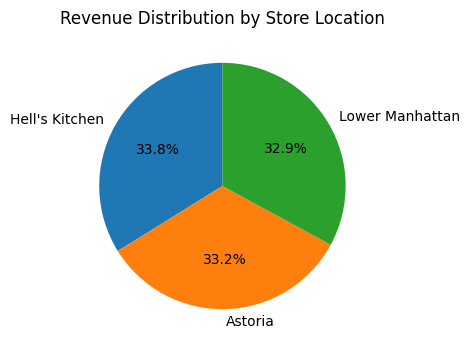

In [32]:
plt.figure(figsize=(8, 4))
plt.pie(
    revenue_by_store["total_revenue"],
    labels=revenue_by_store["store_location"],
    autopct="%1.1f%%",
    startangle=90)

plt.title("Revenue Distribution by Store Location")
plt.show()

### 2. Monthly Revenue by Store Location

In [33]:
monthly_revenue_by_store=coffe_data.pivot_table(index='month', columns='store_location', values='total_sales',   
                       aggfunc="sum").sort_values('month')

monthly_revenue_by_store

store_location,Astoria,Hell's Kitchen,Lower Manhattan
month,,,
2023-01,27313.66,27820.65,26543.43
2023-02,25105.34,25719.80,25320.05
2023-03,32835.43,33110.57,32888.68
2023-04,39477.61,40304.14,39159.33
2023-05,52428.76,52598.93,51700.07
2023-06,55083.11,56957.08,54445.69


Revenue grows steadily across all locations from January to June, with Hell’s Kitchen generating the highest sales each month.

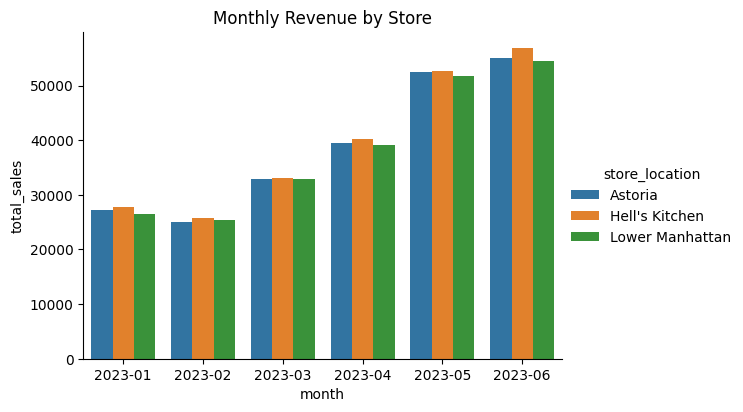

In [34]:
monthly_revenue_by_store.columns = [str(col) for col in monthly_revenue_by_store.columns]
monthly_revenue_by_store = monthly_revenue_by_store.reset_index()

monthly_revenue_by_store['month'] = monthly_revenue_by_store['month'].astype(str)
monthly_revenue_by_store_long = monthly_revenue_by_store.melt(
    id_vars='month',
    var_name='store_location',
    value_name='total_sales'
)

sns.catplot(
    data=monthly_revenue_by_store_long,
    kind='bar',
    x='month', y='total_sales', hue='store_location',
    height=4, aspect=1.5
)
plt.title('Monthly Revenue by Store')
plt.show()

# III. Descriptive statistics

In [35]:
coffe_data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_sales,month,hour,weekday
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,2023-01,7,Sunday
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01,7,Sunday
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,2023-01,7,Sunday
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,2023-01,7,Sunday
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01,7,Sunday


In [36]:
coffe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  string        
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  string        
 5   store_location    149116 non-null  string        
 6   product_id        149116 non-null  string        
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  string        
 9   product_type      149116 non-null  string        
 10  product_detail    149116 non-null  string        
 11  total_sales       149116 non-null  float64       
 12  month             149116 non-null  period[M]     
 13  hour              149116 non-null  int32         
 14  week

In [37]:
# Define identifier columns that should not be treated as categorical variables
id_columns = ['transaction_id', 'store_id', 'product_id']

# Select string-type columns excluding ID columns to identify true categorical features
categorical_cols = [
    col for col in coffe_data.select_dtypes(include='string').columns
    if col not in id_columns]

# Convert selected categorical columns to 'category' data type
coffe_data[categorical_cols] = coffe_data[categorical_cols].astype('category')

In [38]:
# Define categorical data types to be detected
categorical_types = ["category"]

# Identify all columns whose data type is categorical
categorical_columns = [col for col in coffe_data.columns if str(coffe_data[col].dtypes) in categorical_types]
categorical_columns

['store_location', 'product_category', 'product_type', 'product_detail']

In [39]:
coffe_data[categorical_columns].head()

,store_location,product_category,product_type,product_detail
0,Lower Manhattan,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,Lower Manhattan,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,Lower Manhattan,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,Lower Manhattan,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,Lower Manhattan,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


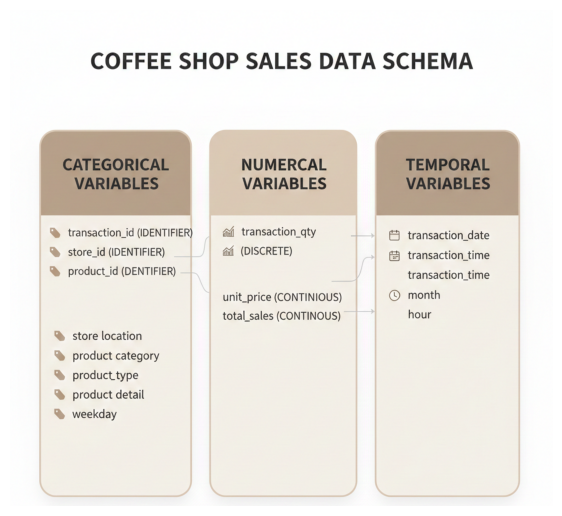

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('C:\\Users\\zahra_gmdmxxo\\OneDrive\\Desktop\\Datacube\\3.PYTHON\\final_project\\data_types.png')
plt.figure(figsize=(7,8))
plt.imshow(image)
plt.axis('off')
plt.show()

- Categorical: store_location, product_category, weekday, product_type
- Numerical (continuous): unit_price, total_sales
- Numerical (discrete): transaction_qty
- Temporal: transaction_date, transaction_time, month, hour

### Boxplot of Unit Price Distribution

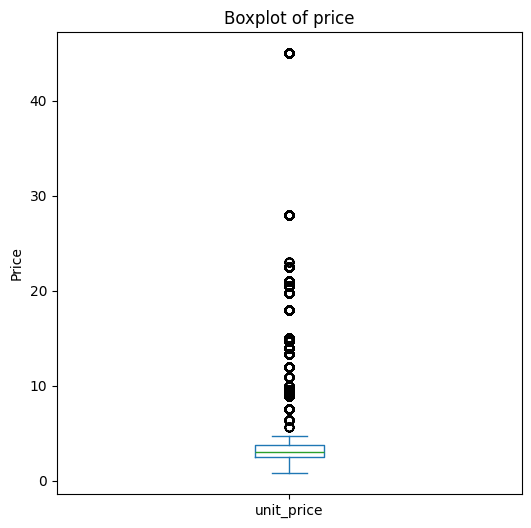

In [41]:
price=coffe_data['unit_price']
plt.figure(figsize=(6,6))
price.plot.box()
plt.title("Boxplot of price")
plt.ylabel("Price")
plt.show()

- The median price is relatively low, indicating that most products are low- to mid-priced.
- The interquartile range (IQR) is narrow, showing that the main price range is compact and consistent.
- There are many outliers on the upper end, which represent expensive and premium products.
- The maximum price reaches up to 45, but such high prices occur rarely.

### Key Metrics Overview

In [42]:
coffe_data[['transaction_qty', 'unit_price', 'total_sales']].describe()

,transaction_qty,unit_price,total_sales
count,149116.000000,149116.000000,149116.000000
mean,1.438276,3.382219,4.686367
std,0.542509,2.658723,4.227099
min,1.000000,0.800000,0.800000
25%,1.000000,2.500000,3.000000
50%,1.000000,3.000000,3.750000
75%,2.000000,3.750000,6.000000
max,8.000000,45.000000,360.000000


transaction_qty: Most orders have 1–2 items.

unit_price: Prices vary, some items are expensive.

total_sales: Few very high sales pull the distribution to the right; most sales are small.

### Distribution Skewness of Key Metrics

In [43]:
coffe_data[['transaction_qty', 'unit_price', 'total_sales']].skew()


transaction_qty     0.799819
unit_price          8.455088
total_sales        41.745899
dtype: float64

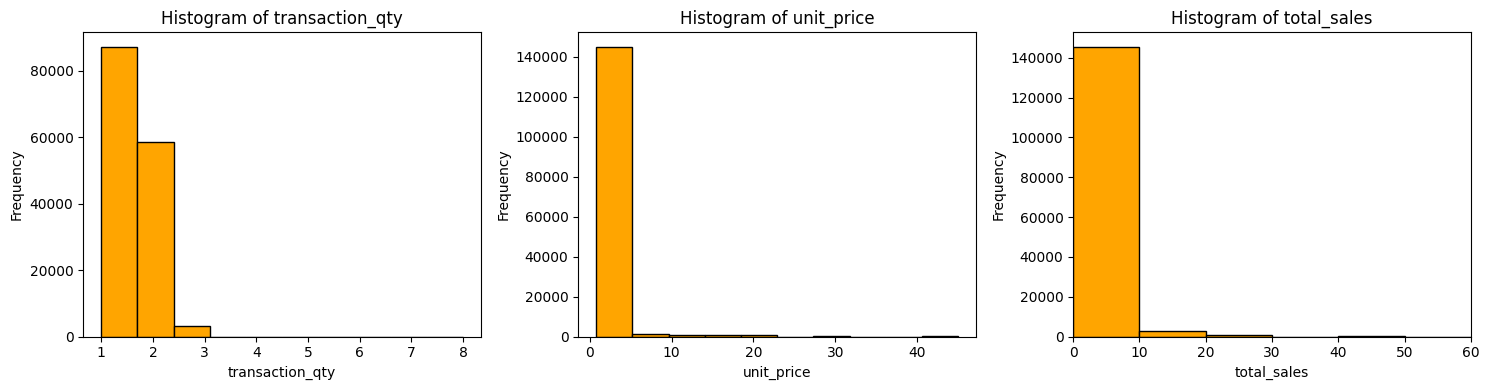

In [51]:
columns = ['transaction_qty', 'unit_price', 'total_sales']

plt.figure(figsize=(15,4))

for i, col in enumerate(columns, 1):
    plt.subplot(1, 3, i)
    
    if col == 'total_sales':
        # total_sales üçün xüsusi aralıq
        bins = [0, 10, 20, 30, 40, 50, 60]
        plt.hist(coffe_data[col], bins=bins, edgecolor='black', color='orange')
        plt.xlim(0, 60)
    else:
        # digər sütunlar normal
        plt.hist(coffe_data[col], bins=10, edgecolor='black' , color='orange')
    
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##### Histogram Analysis Summary

**Transaction Quantity:**
The highest frequency is observed at 1 and 2 items, indicating that most customers purchase one or two products per transaction. Orders with three or more items are relatively rare.

**Unit Price:**
Most product prices fall within the 2–5 range. The distribution shows a long right tail, meaning high-priced products are uncommon. Prices between 20 and 45 can be considered outliers.

**Total Sales:**
The majority of transactions generate low sales values (0–10). Only a small number of transactions result in very high sales (100+, 300+), causing the distribution to be right-skewed.

In [47]:
coffe_data.to_excel(
    "coffee_sales_features.xlsx",
    index=False
)

After performing feature engineering or any preprocessing on the `coffe_data` DataFrame, we save it as an **Excel file**.  

This ensures we have a **persistent copy** of our cleaned and processed data for future use or merging with weather data.
